In [2]:
import pickle
import sys
import os
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

sys.path.append(".")

from itertools import product
from pathlib import Path
from typing import Tuple, Dict, NewType, List

In [3]:
def get_runs(path: str):
    return [x for x in os.listdir(path) if "run" in x]

Figure = NewType('Figure', matplotlib.figure.Figure)
Axis   = NewType('Figure', matplotlib.axes.Axes)

def heat_plot(X: np.array, size: Tuple[int] = None,
              x_tick_labels: List[str] = None,
              y_tick_labels: List[str] = None,
              cmap: str = None,
              cbar: bool = False,
              fig: Figure = None,
              ax: Axis = None) -> Tuple[Figure, Axis]:
    if fig == None and ax == None:
        fig, ax = plt.subplots(1, 1)
        if size != None:
            fig.set_size_inches(size)
        else:
            fig.set_size_inches(w = 15, h = 10)
    
    sns.heatmap(X, linewidth = 0, ax = ax, cmap = cmap, cbar = cbar)
    
    ax.locator_params('x', nbins = 3)
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
    
    if x_tick_labels != None:
        ax.set_xticklabels(x_tick_labels)
    if y_tick_labels != None:
        ax.set_yticklabels(y_tick_labels)
    
    return fig, ax

def get_mean_stats(param_list: Dict, results_path: str, T: int) -> Dict:
    mean_stats = {}
        
    for param in product(*param_list.values()):
        input_path = Path(results_path) / str(param)
        try:
            runs = get_runs(input_path)
        except:
            continue
        
        mean_run_stats = {
            "Entropy": np.zeros(T),
            "Proximity": np.zeros(T),
            "Polarity": np.zeros(T),
            "Distribution": np.zeros((32, T))
        }
        
        num_runs = len(runs)
        
        for run in runs:
            stats = pickle.load(open(input_path / run, "rb"))
            mean_run_stats['Entropy'] += stats['Entropy']
            mean_run_stats['Proximity'] += stats['Proximity']
            mean_run_stats['Polarity'] += stats['Polarity']
            mean_run_stats['Distribution'] += np.array(stats['Distribution']).T
            
        mean_run_stats['Entropy'] /= num_runs
        mean_run_stats['Proximity'] /= num_runs
        mean_run_stats['Polarity'] /= num_runs
        mean_run_stats['Distribution'] /= num_runs
        
        mean_stats[param] = mean_run_stats
        
    return mean_stats

In [4]:
# Experiment's setup

param_list = {
    "graph_type": ["barabasi"],
    "network_size": [500],
    "memory_size": [160],
    "code_length": [5],
    "kappa": [0, 15, 30],
    "lambda": [0, 0.1, 0.3, 1, 5],
    "alpha": [1, 0.8, 0.6, 0.4, 0.2],
    "omega": [0, 0.2, 0.4, 0.6, 0.8],
    "gamma": [-10, 0, 10],
    "prefferential_att": [2]
}

experiment_path =  "/media/roboto/Tranqueiras/entropia_grafos_experimentos/experiment_barabasi_with_polarization"

simulated_params = [x for x in os.listdir(experiment_path) if '(' in x]

In [5]:
mean_stats = pickle.load(open("mean_stats_barabasi_polarization.pkl", "rb"))

### Cenário 1: Um grupo polarizado

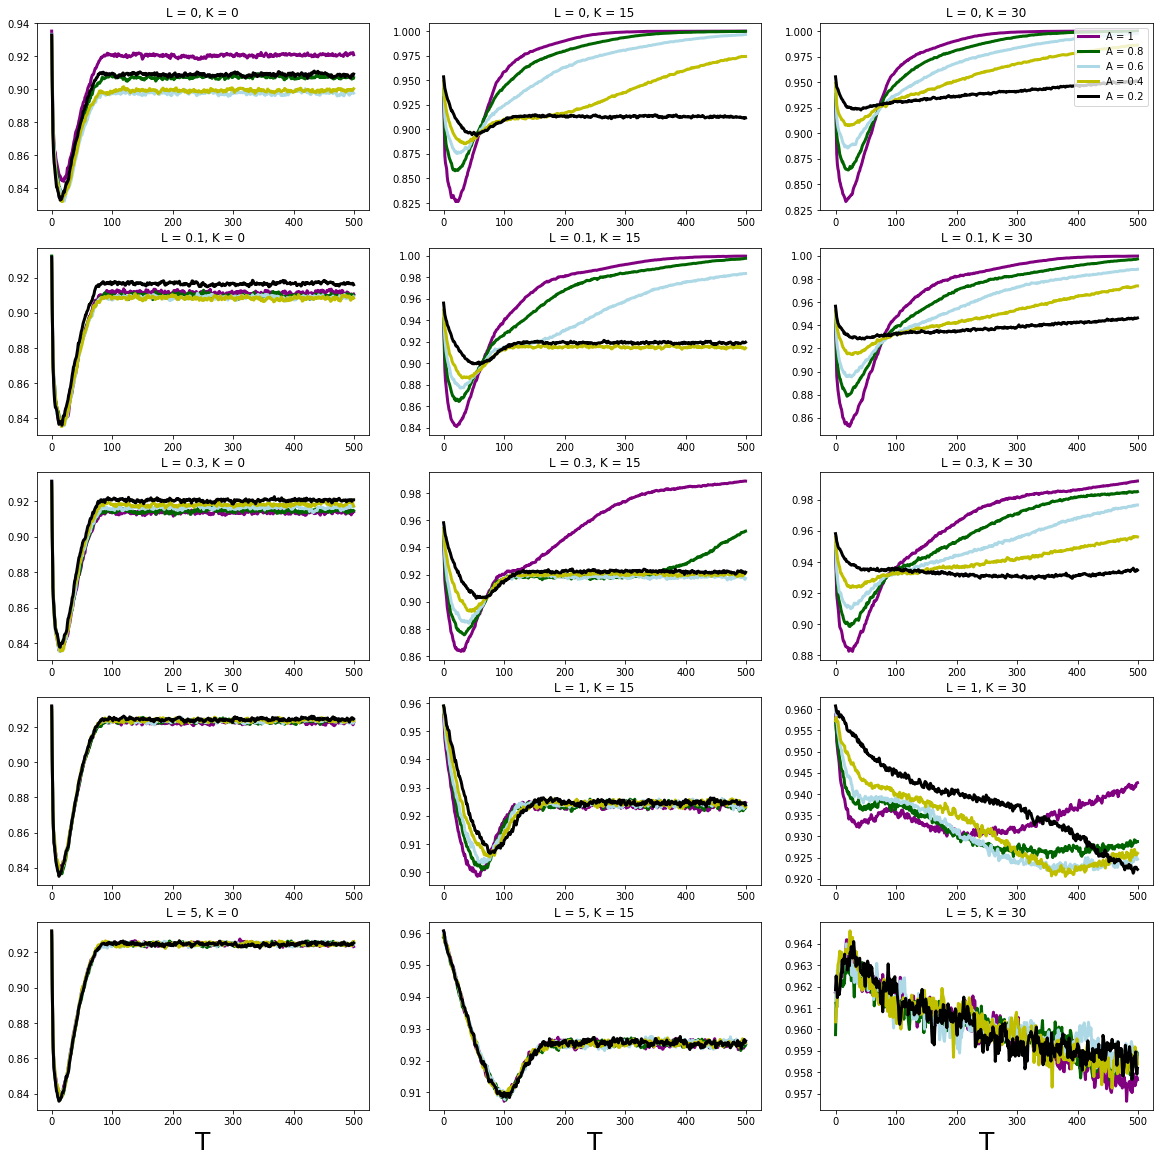

In [6]:

fig, axs = plt.subplots(ncols = 3, nrows = 5, figsize = (20, 20))
fig.subplots_adjust(wspace = 0.18)
for ax in axs[4]:
    ax.set_xlabel("T", fontsize = 25)
    
colors = {
    1: "purple",
    0.8: "darkgreen",
    0.6: "lightblue",
    0.4: "y",
    0.2: "k"
}

style = {
    0: '--',
    15: '-',
    30: ':'
}

alpha = [1, 0.8, 0.6, 0.4, 0.2]

for i in range(len(alpha)):
    for j in range(len(param_list['kappa'])):
        for k in range(len(param_list['lambda'])):
            param = ("barabasi", 500, 160, 5, param_list['kappa'][j], param_list['lambda'][k], alpha[i], 0, 0, 2)

            results = mean_stats[param]
            Y = results['Proximity']
            X = range(len(Y))

            axs[k][j].plot(X, Y, label = f'A = {alpha[i]}', color = colors[alpha[i]], linewidth = 3)

            axs[k][j].set_title(f"L = {param_list['lambda'][k]}, K = {param_list['kappa'][j]}")
            
axs[0][2].legend(fontsize = 10, loc = 1)

### Cenário 2 - Dois grupos polarizados

### Cenário 3 - Dois grupos polarizados